In [1]:
N = ord("D") % 5 + 1
N

4

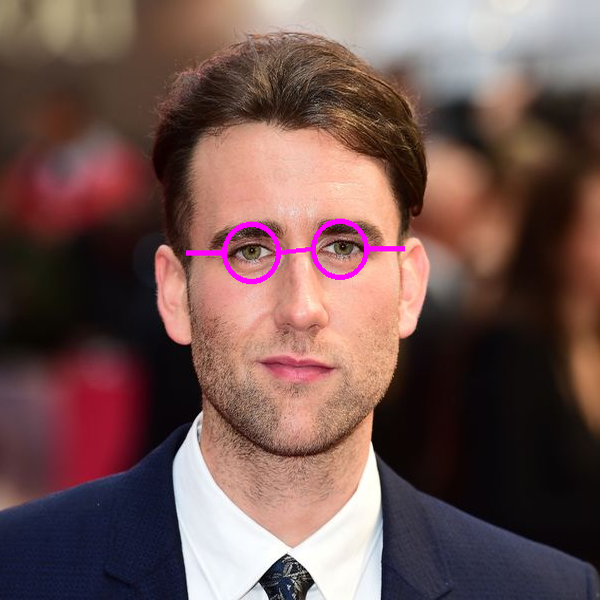

In [5]:
import cv2 as cv
from PIL import Image, ImageDraw
import pandas as pd

data_frame = pd.read_excel(r"C:\Py\kr1.xlsx")

def add_glasses(image_data):
    image_file_name = image_data['file name']
    target_image_size = tuple(map(int, image_data['image size'].split('x')))
    glasses_outline_color = image_data['glasses color']
    glasses_line_thickness = int(image_data['line width'])

    input_image_path = f"Images/{image_file_name}"
    loaded_image = cv.imread(input_image_path)

    if loaded_image is None:
        return f"Error: Image '{image_file_name}' not found."

    gray_image = cv.cvtColor(loaded_image, cv.COLOR_BGR2GRAY)
    
    face_detector = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_detector = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

    detected_faces = face_detector.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    detected_eyes = eye_detector.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=7, minSize=(35, 35), maxSize=(70, 70))

    rgb_image = cv.cvtColor(loaded_image, cv.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_image, mode="RGB")
    image_drawer = ImageDraw.Draw(pil_image)

    face_coordinates = None
    if len(detected_faces) > 0:
        face_coordinates = detected_faces[0]

    if len(detected_eyes) == 2:
        detected_eyes = sorted(detected_eyes, key=lambda eye: eye[0])
        left_eye, right_eye = detected_eyes

        for ex, ey, ew, eh in detected_eyes:
            image_drawer.ellipse(
                [ex - 4, ey - 4, ex + ew + 4, ey + eh + 4],
                outline=glasses_outline_color,
                width=glasses_line_thickness
            )

        lx, ly, lw, lh = left_eye
        rx, ry, rw, rh = right_eye
        image_drawer.line([(lx + lw, ly + lh // 2), (rx, ry + rh // 2)], fill=glasses_outline_color, width=glasses_line_thickness)

        left_hook_start = (lx - 40, ly + lh // 2)
        left_hook_end = (lx - 1, ly + lh // 2)
        right_hook_start = (rx + rw + 1, ry + rh // 2)
        right_hook_end = (rx + rw + 40, ry + rh // 2)
        image_drawer.line([left_hook_start, left_hook_end], fill=glasses_outline_color, width=glasses_line_thickness)
        image_drawer.line([right_hook_start, right_hook_end], fill=glasses_outline_color, width=glasses_line_thickness)

    if face_coordinates is not None and len(face_coordinates) > 0:
        fx, fy, fw, fh = face_coordinates
        face_center_x, face_center_y = fx + fw // 2, fy + fh // 2

        max_face_dimension = max(fw, fh)
        crop_dimension = max(target_image_size)

        crop_left = max(0, face_center_x - crop_dimension // 2)
        crop_top = max(0, face_center_y - crop_dimension // 2)
        crop_right = min(pil_image.width, face_center_x + crop_dimension // 2)
        crop_bottom = min(pil_image.height, face_center_y + crop_dimension // 2)

        pil_image = pil_image.crop((crop_left, crop_top, crop_right, crop_bottom))

    pil_image = pil_image.resize(target_image_size, Image.Resampling.LANCZOS)

    output_image_path = f"Outputs/{image_file_name}"
    pil_image.save(output_image_path)

    return pil_image

# 4 варіант
add_glasses(data_frame.iloc[3])

# Тести на інших зображеннях 

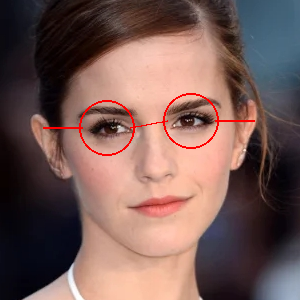

In [6]:
add_glasses(data_frame.iloc[0])

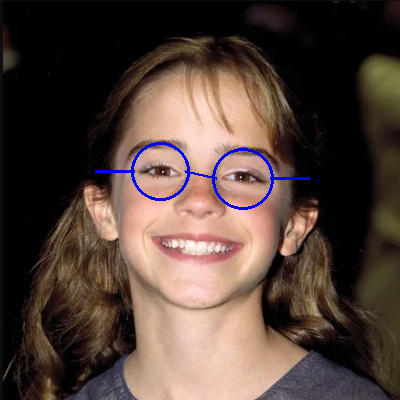

In [7]:
add_glasses(data_frame.iloc[1])